# Analyse en composantes principales

L'analyse en composantes principales (ACP ou PCA en anglais pour principal component analysis) est une méthode de la famille de l'analyse des données et plus généralement de la statistique multivariée qui consiste à transformer des variables liées entre elles (dites « corrélées ») en nouvelles variables décorrélées les unes des autres. Ces nouvelles variables sont nommées « composantes principales », ou axes principaux. Elle permet de réduire le nombre de variables et de rendre l'information moins redondante. 

Il s'agit d'une approche :
- géométrique : les variables étant représentées dans un nouvel espace, selon des directions d'inertie maximale
- statistique : la recherche portant sur des axes indépendants expliquant au mieux la variabilité — la variance — des données). Lorsqu'on veut compresser un ensemble de $N$ variables aléatoires, les $n$ premiers axes de l'analyse en composantes principales sont un meilleur choix, du point de vue de l'inertie ou de la variance.

L'outil mathématique est appliqué dans d'autres domaines que les statistiques et est parfois appelé décomposition orthogonale aux valeurs propres ou POD (anglais : proper orthogonal decomposition). 

Cours :
http://josephsalmon.eu/enseignement/Montpellier/HMMA308/PCA_slides.pdf

## 1er exemple : analyse des températures

In [1]:
import pandas as pd

In [2]:
url = "http://factominer.free.fr/livre/temperat.csv"

In [3]:
data = pd.read_csv(url,encoding = "ISO-8859-1",sep=";")

In [4]:
data = pd.DataFrame(data)
data.describe()

,Janvier,Février,Mars,Avril,Mai,Juin,Juillet,Août,Septembre,Octobre,Novembre,Décembre,Moyenne,Amplitude,Latitude,Longitude
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,1.345714,2.217143,5.228571,9.282857,13.911429,17.414286,19.622857,18.980000,15.631429,11.002857,6.065714,2.880000,10.265714,18.317143,48.771429,11.980000
std,5.502157,5.498956,4.863040,3.806456,3.273582,3.320271,3.574673,3.727939,4.109728,4.323226,4.566820,4.967411,3.963061,4.505649,7.022467,8.891132
min,-9.300000,-7.900000,-3.700000,2.900000,6.500000,9.300000,11.100000,10.600000,7.900000,4.500000,-1.100000,-6.000000,4.500000,10.200000,37.200000,0.000000
25%,-1.550000,-0.150000,1.600000,7.250000,12.150000,15.400000,17.300000,16.650000,13.000000,8.650000,3.200000,0.250000,7.750000,14.900000,43.900000,4.350000
50%,0.200000,1.900000,5.400000,8.900000,13.800000,16.900000,18.900000,18.300000,14.800000,10.200000,5.100000,1.700000,9.700000,18.500000,50.000000,9.400000
75%,4.900000,5.800000,8.500000,12.050000,16.350000,19.800000,21.750000,21.600000,18.250000,13.300000,7.900000,5.400000,12.650000,21.450000,52.750000,18.650000
max,10.700000,11.800000,14.100000,16.900000,20.900000,24.500000,27.400000,27.200000,24.300000,19.400000,14.900000,12.000000,18.200000,27.600000,64.100000,30.300000


On corrige le nom de la première colonne. Une manière possible est de transformer l'index en liste, de modifier la première donnée de la liste, puis de la réaffecter à l'index des colonnes du tableau.

In [5]:
noms_colonnes = list(data.columns)

In [8]:
noms_colonnes[0]='Ville'

In [9]:
data.columns = noms_colonnes

Nombre de variables étudiées (on ne prend pas en compte la première colonne qui fait permet d'identifier les individus)

In [33]:
len(data.columns)-1

17

Nombre d'individus de la population étudiée :

In [34]:
len(data.index)

35

On se contente des données de températures mensuelles :

In [35]:
temp = data.iloc[:,1:13]

In [36]:
temp

,Janvier,Février,Mars,Avril,Mai,Juin,Juillet,Août,Septembre,Octobre,Novembre,Décembre
0,2.9,2.5,5.7,8.2,12.5,14.8,17.1,17.1,14.5,11.4,7.0,4.4
1,9.1,9.7,11.7,15.4,20.1,24.5,27.4,27.2,23.8,19.2,14.6,11.0
2,-0.2,0.1,4.4,8.2,13.8,16.0,18.3,18.0,14.4,10.0,4.2,1.2
3,3.3,3.3,6.7,8.9,12.8,15.6,17.8,17.8,15.0,11.1,6.7,4.4
4,-1.1,0.8,5.5,11.6,17.0,20.2,22.0,21.3,16.9,11.3,5.1,0.7
5,-0.4,-0.4,1.3,5.8,11.1,15.4,17.1,16.6,13.3,8.8,4.1,1.3
6,4.8,5.0,5.9,7.8,10.4,13.3,15.0,14.6,12.7,9.7,6.7,5.4
7,-5.8,-6.2,-2.7,3.1,10.2,14.0,17.2,14.9,9.7,5.2,0.1,-2.3
8,-5.9,-5.0,-0.3,7.4,14.3,17.8,19.4,18.5,13.7,7.5,1.2,-3.6
9,-3.7,-2.0,1.9,7.9,13.2,16.9,18.4,17.6,13.7,8.6,2.6,-1.7


In [37]:
temp.iloc[data[data.Ville == 'Paris'].index ]

,Janvier,Février,Mars,Avril,Mai,Juin,Juillet,Août,Septembre,Octobre,Novembre,Décembre
16,3.7,3.7,7.3,9.7,13.7,16.5,19.0,18.7,16.1,12.5,7.3,5.2


On calcule les moyennes par colonne :

In [38]:
moyennes = temp.mean()

In [39]:
moyennes

Janvier       1.345714
Février       2.217143
Mars          5.228571
Avril         9.282857
Mai          13.911429
Juin         17.414286
Juillet      19.622857
Août         18.980000
Septembre    15.631429
Octobre      11.002857
Novembre      6.065714
Décembre      2.880000
dtype: float64

On centre les données :

In [40]:
temp_centrees = temp - moyennes

Que peut-on dire de la température à Paris (16ème ville) en janvier et en août par rapport à la moyenne ?

In [41]:
temp_centrees.iloc[16,[0,7]]

Janvier    2.354286
Août      -0.280000
Name: 16, dtype: float64

La température à Paris est supérieure à la moyenne en janvier mais pas en août.

On calcule les écart types par colonne :

In [42]:
temp.std(ddof=0)

Janvier      5.422985
Février      5.419831
Mars         4.793065
Avril        3.751684
Mai          3.226477
Juin         3.272495
Juillet      3.523236
Août         3.674297
Septembre    4.050592
Octobre      4.261018
Novembre     4.501107
Décembre     4.895934
dtype: float64

On réduit les données :

In [43]:
temp_centreesreduites = temp_centrees/temp.std(ddof=0)

In [44]:
temp_centreesreduites

,Janvier,Février,Mars,Avril,Mai,Juin,Juillet,Août,Septembre,Octobre,Novembre,Décembre
0,0.286611,0.052189,0.098356,-0.288632,-0.437452,-0.798866,-0.716062,-0.511663,-0.279324,0.093204,0.207568,0.310462
1,1.429892,1.380644,1.350165,1.630506,1.918058,2.165233,2.207386,2.237163,2.016636,1.923752,1.896041,1.658519
2,-0.285030,-0.390629,-0.172869,-0.288632,-0.034536,-0.432174,-0.375467,-0.266718,-0.304012,-0.235356,-0.414501,-0.343142
3,0.360371,0.199795,0.306991,-0.102049,-0.344471,-0.554404,-0.517382,-0.321150,-0.155885,0.022798,0.140918,0.310462
4,-0.450990,-0.261474,0.056629,0.617627,0.957258,0.851251,0.674704,0.631413,0.313182,0.069735,-0.214550,-0.445267
5,-0.321910,-0.482883,-0.819637,-0.928345,-0.871362,-0.615520,-0.716062,-0.647743,-0.575577,-0.516979,-0.436718,-0.322717
6,0.636971,0.513458,0.140083,-0.395251,-1.088317,-1.257232,-1.312105,-1.192065,-0.723704,-0.305762,0.140918,0.514713
7,-1.317672,-1.553027,-1.654176,-1.648022,-1.150304,-1.043328,-0.687679,-1.110417,-1.464336,-1.361847,-1.325388,-1.058021
8,-1.336112,-1.331618,-1.153452,-0.501870,0.120432,0.117866,-0.063254,-0.130637,-0.476826,-0.822070,-1.081004,-1.323547
9,-0.930431,-0.778095,-0.694456,-0.368596,-0.220497,-0.157154,-0.347084,-0.375582,-0.476826,-0.563916,-0.769969,-0.935470


Nous pouvons désormais réaliser une Analyse en Composantes Principales sur des données centrées réduites (normées).

Le tableau peut-être analysé à travers ses lignes (les individus) ou les colonnes (les variables). 
- Typologie des individus : il existe une variabilité de températures entre les villes => on veut former des groupes de villes semblables ;
- Typologie des variables : il existe des variables corrélées => on veut former des groupes de variables corrélées.

**Quels groupes de variables expliquent le mieux la variabilité entre les individus ?**

In [45]:
tableau = temp_centreesreduites

### Nuage des individus
Un individu (une ville) est un point de $\mathbb{R}^{12}$ (espace à 12 dimensions). On cherche à identifier les groupes de points proches et les points isolés. Le nuage de points peut avoir une certaine forme, des directions d'allongement en particulier. Il faut définir une **distance** entre les points.

On choisit une métrique euclidienne : la distance (au carré) entre deux individus $i$ et $j$ est 
$$d^2(i,j) = \sum_{k=1}^{12} (x_{i,k}-x_{j,k})^2$$

Laquelle est de ces deux villes (Athènes et Paris) est la plus éloignée d'Amsterdam ?

In [46]:
sum((tableau.iloc[0,:]-tableau.iloc[16,:])**2) #distance avec Paris

1.4845174676147137

In [47]:
sum((tableau.iloc[0,:]-tableau.iloc[1,:])**2) #distance avec Amsterdam

52.049449343463344

### Nuage des variables
Chaque colonne (un mois) est un vecteur de $\mathbb{R}^{35}$. Le nuage contient $12$ vecteurs et chaque axe de sa représentation correspond à une ville.

On choisit de même une norme euclidienne et le produit scalaire usuel. Ainsi, le produit scalaire entre deux colonnes $i$ et $j$ est :
$$<X_i,X_j> = \sum_{k=1}^{35} x_{k,i}x_{k,j}$$

Du fait que chaque valeur $x_{k,i}$ est une donnée centrée et réduite, on reconnait la définition du coefficient de corrélation linéaire :
$$cor(X_i,X_j) = \frac{1}{n} <X_i,X_j>$$

https://fr.wikipedia.org/wiki/Corr%C3%A9lation_(statistiques)#Coefficient_de_corr%C3%A9lation_lin%C3%A9aire_de_Bravais-Pearson

Du fait que les valeurs du tableau sont réduites, la norme de chaque colonne est égale à 1. On peut donc visualiser l'ensemble des 12 vecteurs sur la sphère unité de $\mathbb{R}^{35}$.

L'angle formé entre deux vecteurs renseigne la corrélation entre les deux variables correspondantes.

### Matrice de corrélation et inertie

On pose $M$ la matrice des variables centrées et réduites. Alors $M^T \cdot M$ est la matrice de corrélation.

In [48]:
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [49]:
M = np.array(tableau)

In [50]:
corr = np.dot(M.transpose(),M)

La matrice de corrélation est symétrique réelle donc diagonalisable dans une base orthonormée.

D'autre part, on pose $X$ la matrice des variables centrées (non réduites). Alors $\frac{1}{35}X^T \cdot X$ est la matrice de covariance.

In [51]:
X = np.array(temp_centrees)
var = np.dot(X.transpose(),X)/35

L'inertie totale est la trace (somme des éléments diagonaux) de la matrice de covariance :

In [52]:
inertie = np.trace(var)
print(inertie)

221.6586775510204


On peut vérifier que l'inertie totale est aussi la somme des variances de chaque colonne :

In [53]:
temp_centrees.var(ddof=0)

Janvier      29.408767
Février      29.374563
Mars         22.973469
Avril        14.075135
Mai          10.410155
Juin         10.709224
Juillet      12.413192
Août         13.500457
Septembre    16.407298
Octobre      18.156278
Novembre     20.259967
Décembre     23.970171
dtype: float64

In [54]:
sum(temp_centrees.var(ddof=0))

221.65867755102036

In [ ]:
sn.heatmap(var, annot=False, fmt='g')
plt.show()

On cherche maintenant les vecteurs propres et les valeurs propres de la matrice de covariance :

In [55]:
W,v = np.linalg.eig(var)

In [56]:
print('Valeurs propres : ' + str(W))

Valeurs propres : [1.95515607e+02 2.28749208e+01 1.78925074e+00 7.45311644e-01
 3.94149701e-01 1.54259653e-01 7.54865884e-02 4.80617860e-02
 2.57780410e-02 1.67316000e-02 7.78487797e-03 1.13346814e-02]


In [57]:
print('Somme des valeurs propres : ' + str(sum(W)))

Somme des valeurs propres : 221.65867755102062


On retrouve bien l'inertie totale.

Voici la distribution des valeurs propres :

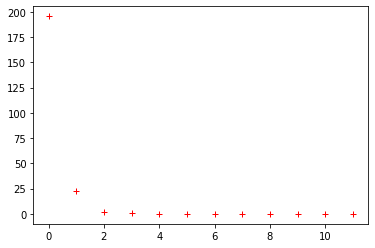

In [107]:
plt.plot(W,'r+')
plt.show()

La plus grande valeur propre est :

In [58]:
max(W)

195.51560743900558

In [59]:
np.argmax(W)

0

Le vecteur propre correspondant est :

In [60]:
v[:,np.argmax(W)]

array([-0.36399701, -0.37168996, -0.33664214, -0.25843671, -0.19758417,
       -0.18939898, -0.20407932, -0.22550242, -0.27861221, -0.30278328,
       -0.31822729, -0.33354611])

Le rapport d'inertie est :

In [61]:
max(W)/inertie

0.8820570870454764

On cherche la deuxième plus grande valeur propre :

In [62]:
ind = np.argsort(W)[[-1,-2]]

Les deux vecteurs propres correspondant aux deux plus grandes valeurs propres :

In [65]:
planfactoriel = v[:,ind]

La contribution de ces deux axes à l'inertie totale :

In [66]:
sum(W[ind])/inertie

0.9852559378599384

### Représentation des individus dans le plan des nouveaux axes

On peut calculer les coordonnées de chaque individu dans le ce plan en projettant orthogonalement sur chaque vecteur du plan :

On calcule par exemple les coordonnées de Paris dans ce plan :

In [72]:
paris = np.array(tableau.iloc[16,:])

Première coordonnée :

In [75]:
np.dot(planfactoriel[:,0],paris)

-0.6987469901628063

Deuxième coordonnée :

In [76]:
np.dot(planfactoriel[:,1],paris)

-0.6418760467334236

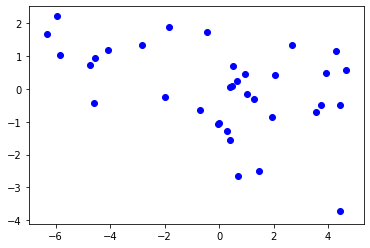

In [94]:
points = []
for i in temp_centrees.index:
    x = np.dot(planfactoriel[:,0],np.array(tableau.iloc[i,:]))
    y = np.dot(planfactoriel[:,1],np.array(tableau.iloc[i,:]))
    points.append((x,y))
    plt.scatter(x,y,color='blue')
plt.show()

La **qualité** de cette représentation en deux dimension est le rapport d'inertie :

In [108]:
sum(W[ind])/inertie

0.9852559378599384

### Contribution d'un individu sur un axe

On calcule la coordonnée au carré de l'individu sur l'axe $k$ divisée par $n \lambda_k$.

Par exemple, la contribution de Paris sur le premier axe :

In [111]:
x,y = points[16]
contrib_1 = x**2/(35*max(W))
print(contrib_1)

7.134941628109415e-05


### Représentation des variables

On veut voir comment les anciennes variables sont liées aux nouvelles : ici, on rappelle que les variables sont les mois. 

In [100]:
np.correlate(planfactoriel[:,0],X[:,0])

array([-8.00050797, -6.58855635, -8.31288057, -3.94219176, -3.39232796,
       -3.88770525, -1.11568643, -2.65502296, -1.11559128,  3.2794131 ,
        7.70085531,  8.49581704,  6.81537633,  0.69985178,  1.38496936,
        3.93516874,  9.86336296,  8.86641752,  8.18153036,  9.02819735,
        6.1383256 ,  2.81306762, -2.72950658, -1.76419369])

In [97]:
planfactoriel[:,0]

array([-0.36399701, -0.37168996, -0.33664214, -0.25843671, -0.19758417,
       -0.18939898, -0.20407932, -0.22550242, -0.27861221, -0.30278328,
       -0.31822729, -0.33354611])

In [101]:
X[:,0]

array([  1.55428571,   7.75428571,  -1.54571429,   1.95428571,
        -2.44571429,  -1.74571429,   3.45428571,  -7.14571429,
        -7.24571429,  -5.04571429,   9.15428571,   2.05428571,
         3.65428571,  -8.24571429, -10.64571429,  -5.64571429,
         2.35428571,  -2.64571429,  -1.64571429,   5.75428571,
        -2.74571429,  -3.04571429,  -4.84571429,   1.75428571,
         7.75428571,   4.25428571,   1.55428571,  -1.14571429,
        -1.24571429,   7.35428571,  -0.24571429,   9.15428571,
         9.35428571,  -9.54571429,  -2.04571429])

In [102]:
len(planfactoriel[:,0])

12

## Exercice :
Faire les calculs présentés dans cet exemple :

http://www.math.u-bordeaux.fr/~mchave100p/wordpress/wp-content/uploads/2013/10/Exemple_interpret_ACP.pdf

## Pour aller plus loin :
Utiliser la librairire sklearn de Python.

https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

Autre exemple d'analyse des vidéos YouTube :
https://www.kaggle.com/manhari/projet-acp-sur-youtube